<a href="https://colab.research.google.com/github/chefhaider/Fake-News-Detection/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [62]:
import pandas as pd
import requests

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/train.csv')

In [64]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [65]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [66]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [67]:
len(df.location.unique())

3342

In [68]:
'''import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


df = pd.read_csv('https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/train.csv')


geolocator = Nominatim(user_agent = "geoapiExercises")
city_name = []




for val in df.location:
  if val == 'nan':
    city_name+=[' ']
    continue

  try:
    city_name+=[ geolocator.geocode(val)[-2].split(',')[-1] ]
  except TypeError:
    city_name+=[' ']
  except GeocoderTimedOut :
    city_name+=[' ']'''

'import pandas as pd\nfrom geopy.geocoders import Nominatim\nfrom geopy.exc import GeocoderTimedOut\n\n\ndf = pd.read_csv(\'https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/train.csv\')\n\n\ngeolocator = Nominatim(user_agent = "geoapiExercises")\ncity_name = []\n\n\n\n\nfor val in df.location:\n  if val == \'nan\':\n    city_name+=[\' \']\n    continue\n\n  try:\n    city_name+=[ geolocator.geocode(val)[-2].split(\',\')[-1] ]\n  except TypeError:\n    city_name+=[\' \']\n  except GeocoderTimedOut :\n    city_name+=[\' \']'

In [69]:
#fig = plt.figure(figsize=(10,80))
#sns.countplot(y="keyword",order=df[df.target == 1]['keyword'].value_counts().index, hue="target",data = df,palette='Paired')

In [70]:
df.dropna(subset = ["keyword"], inplace=True)

In [71]:
df['text'].head()

31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
32    We always try to bring the heavy. #metal #RT h...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
Name: text, dtype: object

In [72]:
import re
import string




def clean_text(text):


    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'',text)


    html=re.compile(r'<.*?>')
    text = html.sub(r'',text)



    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)


    table=str.maketrans('','',string.punctuation)
    return text.translate(table)



df['text'] = df['text'].apply(lambda x: clean_text(x))


In [73]:
#df.loc[df['keyword'].notnull(), 'text'] = df['keyword'] + ' ' + df['text']
#test.loc[test['keyword'].notnull(), 'text'] = test['keyword'] + ' ' + test['text']


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer


tf_idf_vect = TfidfVectorizer(ngram_range=(1,3)) # one,two and three gram vectorization
tf_idf_mat = tf_idf_vect.fit_transform(df['text'].values) # fit_transform vectorizer to dtrain['text']

type(tf_idf_mat)
print(tf_idf_mat.get_shape())

(7552, 148500)


In [75]:
type(tf_idf_mat)

scipy.sparse.csr.csr_matrix

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV




x1, x_test1, y1, y_test1 = train_test_split(tf_idf_mat,df['target'],train_size=0.8, random_state = 0)

m_model = MultinomialNB(alpha=1).fit(x1, y1)

alpha_val = {'alpha',np.arange(0,1)}

m_model = GridSearchCV(knn, param_grid, cv=5)
#m_model.score(x_test1,y_test1)
pred = m_model.predict(x_test1)
print(classification_report(y_test1, pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       858
           1       0.91      0.54      0.68       653

    accuracy                           0.78      1511
   macro avg       0.82      0.75      0.75      1511
weighted avg       0.81      0.78      0.76      1511



In [77]:
df.dropna(subset = ["keyword"], inplace=True)
df.reset_index(drop=True, inplace=True)


from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer() # one,two and three gram vectorization
count_mat = tf_idf_vect.fit_transform(df['keyword'].values) # fit_transform vectorizer to dtrain['text']




from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report





x2, x_test2, y2, y_test2 = train_test_split(count_mat,df['target'],train_size=0.8, random_state = 0)

b_model = BernoulliNB(alpha=1).fit(x2, y2)
#b_model.score(x_test2,y_test2)
pred = b_model.predict(x_test2)
print(classification_report(y_test2, pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       858
           1       0.73      0.56      0.64       653

    accuracy                           0.72      1511
   macro avg       0.73      0.70      0.71      1511
weighted avg       0.72      0.72      0.72      1511



In [78]:
prob1 = [ val[1] for val in m_model.predict_proba(x_test1) ]
prob2 = [ val[1] for val in  b_model.predict_proba(x_test2) ]

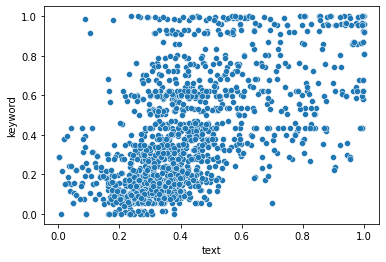

In [79]:
prob_df = pd.DataFrame()
prob_df['text'] = prob1
prob_df['keyword'] = prob2

sns.scatterplot(data=prob_df, x="text", y="keyword")

In [80]:
from sklearn.metrics import classification_report

prediction = []

for val1,val2 in zip(prob1,prob2):


  if val1<.5 and val2<.6:
    prediction.append(0)


  elif val1<.4 and val2<.8:
    prediction.append(0)


  else:
    prediction.append(1)


print(classification_report(y_test1, prediction))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       858
           1       0.85      0.62      0.72       653

    accuracy                           0.79      1511
   macro avg       0.80      0.77      0.77      1511
weighted avg       0.80      0.79      0.78      1511



In [81]:



from sklearn.model_selection import train_test_split
import numpy as np


from keras import Sequential
from keras.layers import Dense


target = np.array(y_test1)


X_train,X_test,y_train,y_test = train_test_split(prob_df[['keyword','text']],target, test_size=0.3, random_state=42, stratify = target)




classifier = Sequential()
#First Hidden Layer
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=2))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)


eval_model=classifier.evaluate(X_train, y_train)

predicts = classifier.predict(X_test)
predicts =(predicts>0.5)
print(classification_report(y_test, predicts))

Epoch 1/100
106/106 [==============================] - 8s 1ms/step - loss: 0.6922 - accuracy: 0.5717
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5810
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.7100
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.7510
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.7510
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.7583
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.7583
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.7529
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.7720
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5673 - accura

In [82]:
'''

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np


knn = KNeighborsClassifier()


target = prob_df['target']

X_train,X_test,y_train,y_test = train_test_split(prob_df[['keyword','text']], target, test_size=0.3, random_state=42, stratify = target)
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train,y_train)
y_pred = knn_cv.predict(X_test)

knn_cv.score(X_test,y_test)
'''

"\n\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.model_selection import GridSearchCV\nimport numpy as np\n\n\nknn = KNeighborsClassifier()\n\n\ntarget = prob_df['target']\n\nX_train,X_test,y_train,y_test = train_test_split(prob_df[['keyword','text']], target, test_size=0.3, random_state=42, stratify = target)\nparam_grid = {'n_neighbors' : np.arange(1,50)}\nknn_cv = GridSearchCV(knn, param_grid, cv=5)\nknn_cv.fit(X_train,y_train)\ny_pred = knn_cv.predict(X_test)\n\nknn_cv.score(X_test,y_test)\n"

In [83]:
'''test = pd.read_csv('https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/test.csv')



test['text'] = test['text'].apply(lambda x: clean_text(x))
tf_idf_mat_test = tf_idf_vect.transform(test['text'].values) # fit_transform vectorizer to dtest['text']
predictions = clf.predict(tf_idf_mat_test)

output = pd.DataFrame({'id': test.id, 'target': predictions})
output.to_csv('my_submission.csv', index=False)'''

"test = pd.read_csv('https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/test.csv')\n\n\n\ntest['text'] = test['text'].apply(lambda x: clean_text(x))\ntf_idf_mat_test = tf_idf_vect.transform(test['text'].values) # fit_transform vectorizer to dtest['text']\npredictions = clf.predict(tf_idf_mat_test)\n\noutput = pd.DataFrame({'id': test.id, 'target': predictions})\noutput.to_csv('my_submission.csv', index=False)"

In [86]:
X_train,X_test,y_train,y_test = train_test_split(df,df['target'], test_size=0.3, random_state=42, stratify = target)


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__estimator__alpha': (1e-2, 1e-3)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print( grid_search_tune.best_estimator_.steps )

ValueError: ignored